# Lecture 5: Continuous Distributions

## Learning Goals

By the end of this lecture, you should be able to:

- Differentiate between continuous and discrete random variables.
- Interpret probability density functions and calculate probabilities from them.
- Calculate and interpret probabilistic quantities (mean, quantiles, prediction intervals, etc.) for a continuous random variable.
- Explain whether a function is a valid probability density function, cumulative distribution function, quantile function, and survival function.
- Calculate quantiles from a cumulative distribution function, survival function, or quantile function.

```{important} 
Let us make a **note on integrals**. Working with continuous random variables sometimes involves integrating some mathematical functions. However, the most we will ever ask you to integrate are basic mathematical functions.

This is not because it is "too hard" to compute integrals but because there is not much pedagogical value in it, mainly because we are gearing this course towards using probability in Data Science. That said, **we must understand what an integral does in the context of probability, intuitively speaking**.

The scope of these upcoming lectures is to understand probability concepts via continuous random variables rather than advanced Calculus.
```

## 1. Continuous Random Variables

Let us set up the following inquiries:

> What is the current water level of the Bow River at Banff, Alberta?

> How tall is a tree?

> What about the current atmospheric temperature in Vancouver, BC?

These are examples of continuous random variables. It turns out that it is trickier to interpret probabilities for continuous random variables, but it also turns out that they are generally easier to work with. 

Not all random variables with infinitely many outcomes are continuous. Take, for example, a [Poisson](poisson-distribution) or [Geometric](geometric-distribution) random variable that can take values $0, 1, 2, \ldots$ with no upper limit. The difference here is that a smaller range of values **does have a finite amount of variables**. By the way, this type of infinity is called **countably infinite**, and a continuous random variable has **uncountably infinite** amount of outcomes.

In practice, we can never measure anything on a continuous scale since any measuring instrument must always round to some precision. For example, your kitchen scale might only measure things to the nearest gram. But, these variables are well approximated by a continuous variable. As a rule of thumb, consider the variable continuous if the difference between neighbouring values is not a big deal.

Let us check an **initial example**. You would like to get a handle on your monthly finances, so you record your total monthly expenses each month. 

``` {figure} img/financial.jpg
:height: 350px
:name: financial
Monthly expenses
```

You end up with **20 months worth of data:**

In [1]:
library(tidyverse)
source("supplementary/expense.R")
source("supplementary/ships.R")
source("supplementary/octane.R")

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
expense$sample %>%
  str_c("$", .)

[1] "$1903.68" "$3269.61" "$6594.05" "$1693.94" "$2863.71" "$3185.01"
 [7] "$4247.04" "$2644.27" "$8040.42" "$2781.11" "$3673.23" "$4870.13"
[13] "$2449.53" "$1772.53" "$7267.11" "$938.67"  "$4625.33" "$3034.81"
[19] "$4946.4"  "$3700.16"

Since a difference of $\$0.01$ is not a big deal, we may as well treat this as a continuous random variable: 

$$X = \text{Total monthly expenses.}$$

That means our random variable is allowed to take on values in between $\$0.01$ and $\$0.02$, but this is unlikely to be a problem in practice.

Let us take a look at a **second example**. Back in the day when Canada had pennies, some people liked to play "*penny bingo*", which involves winning and losing pennies. 

``` {figure} img/piggy-bank.png
:height: 350px
:name: piggy-bank
A piggy bank
```

Here are your **10 net winnings**:

In [3]:
set.seed(4)
(rnorm(10, mean = 0, sd = 2.5) / 100) %>%
  round(2)

[1]  0.01 -0.01  0.02  0.01  0.04  0.02 -0.03 -0.01  0.05  0.04

Since a difference of a penny (e.g., $\$0.01$) is a big deal, it is best to treat this as discrete. We do not want a random variable that can produce an outcome of $\$0.0123$, because that would not make sense for penny bingo.

As a **third example**, if one is modeling **the number of flu cases in Canada**, even though this is inherently discrete, it would probably be fine to treat these numbers as continuous because the numbers are large and continuous random variables are often easier to work with. 

``` {figure} img/medical.png
:height: 350px
:name: medical
Medical checking
```

For example, if your model of the disease allows the number of cases to be $843.423$, it is fine. But if you were modeling **the number of flu waves**, you would want this to be discrete, because these are small integers like $1,2,3,4$ and saying there were $1.423284$ flu waves would not make any sense.

## 2. How Heavy is a Tree?

Let us talk about trees:

> How heavy is a tree?

``` {figure} img/trees.png
:height: 350px
:name: trees
A sample of trees
```

Well, it depends on how tall the tree is! Okay, let us say the tree is $5 \text{ m}$ tall. How heavy is it? Well, not all $5 \text{ m}$ trees are the same weight -- is the tree broad or thin? Actually, trees are not necessarily wide or narrow; they might be a mix. For example, the bottom of the tree might be wide, but the top of the tree might be narrow. So, **we cannot just say something like**:

> "Every meter of the tree weighs $500 \text{ kg}$."

Perhaps the bottom meter of the tree weighs $500 \text{ kg}$, and the top meter weighs $100 \text{ kg}$. This brings us to the idea of *density*: the density of the tree, measured in $\text{kg/m}$, **is a function that varies as you move up the tree**. You can think of it as the weight of an infinitely thin slice of tree, divided by the thickness of that slice. We could plot such a function:


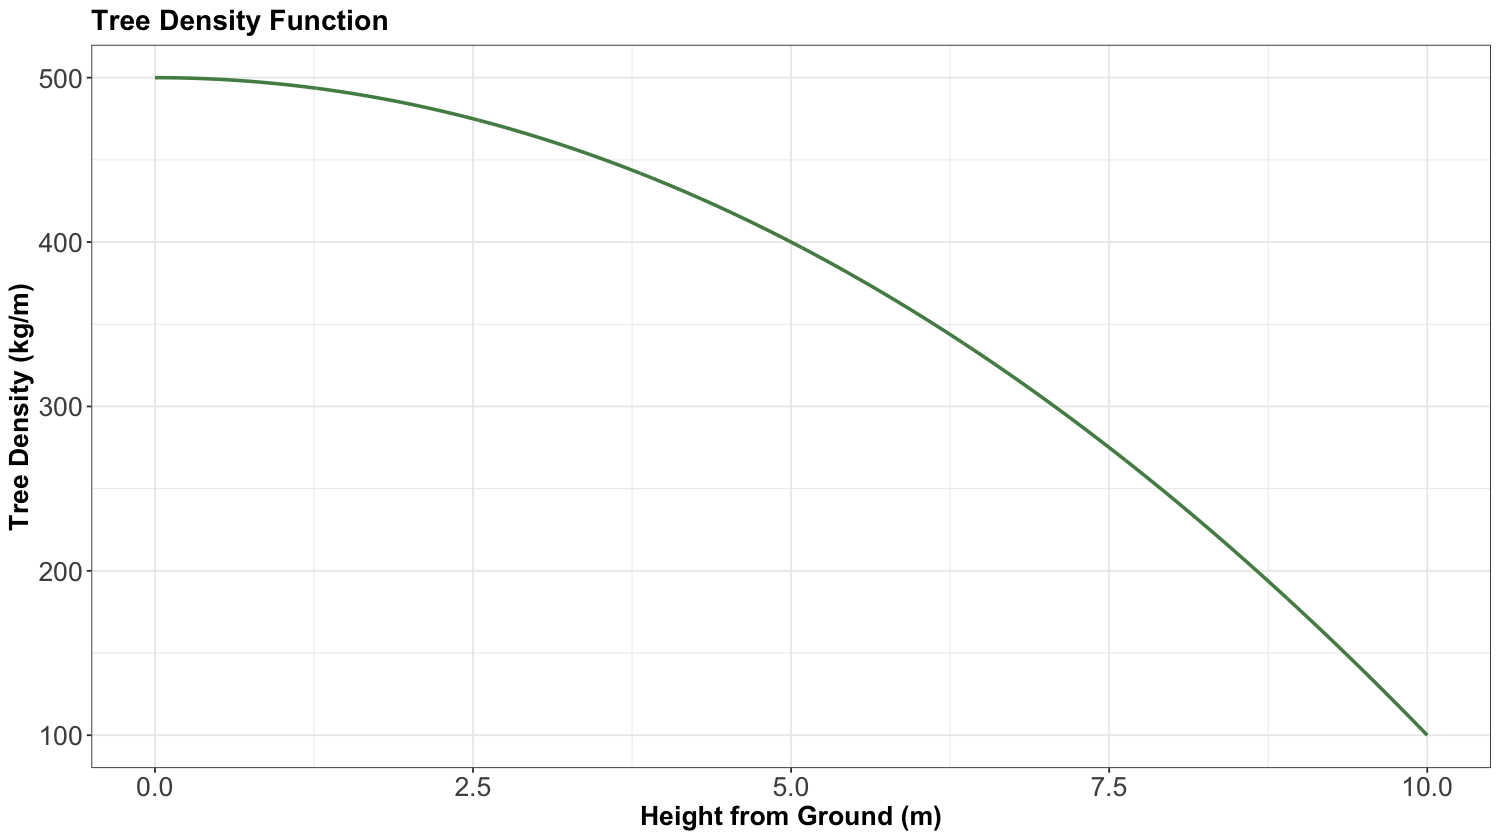

In [4]:
options(repr.plot.width = 12.5)

tree_density <- tibble(x = seq(0, 10, length = 1000), y = 500 - 4 * x^2)

tree_plot <- ggplot(tree_density, aes(x, y)) +
  geom_line(color = "palegreen4", linewidth = 1) +
  labs(x = "Height from Ground (m)",
       y = "Tree Density (kg/m)") +
  theme_bw() +
  theme(plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold")) +
  ggtitle("Tree Density Function")
tree_plot

The above plot shows how the density might decrease from $500 \text{ kg/m}$ at the bottom of the tree to $100 \text{ kg/m}$ at the top. If we wanted the total weight of the tree, we would take the **integral** of this function. If we can integrate this tree density function $f(x)$, then the weight of the tree would be:

$$\int_0^{10} f(x) \text{d}x.$$

> What if I asked you how much the tree weighs at a height equal to $5 \text{ m}$?

This is a weird question; the tree does not really have a weight at a height equal to $5 \text{ m}$; it only has a density at a height equal to $5 \text{ m}$, which looks to be $400 \text{ kg/m}$ from the plot. But (as we will soon see), we do need an answer to this question, so we are going to say that the weight of the tree at a height equal to $5 \text{ m}$ **is zero**. 

Why? Let us call the height up the tree $x$ and the density $f(x)$. Then, the weight between heights $a$ and $b$ is 

$$\int_a^b f(x) \text{d}x.$$ 

Thus, the weight at $x = 5 \text{ m}$ is 

$$\int_5^5 f(x) \text{d}x = 0.$$

In other words, we let the rules of math answer this strange question for us. The weight of the tree at a height equal to $5 \text{ m}$ is zero. If we want a nonzero answer, we need to ask for the weight of the tree in an **interval** between two heights. And the weight of the whole tree is the weight between $x = 0  \text{ m}$ and $x = 10  \text{ m}$ since that is how tall the tree is. This is the shaded area under the curve:

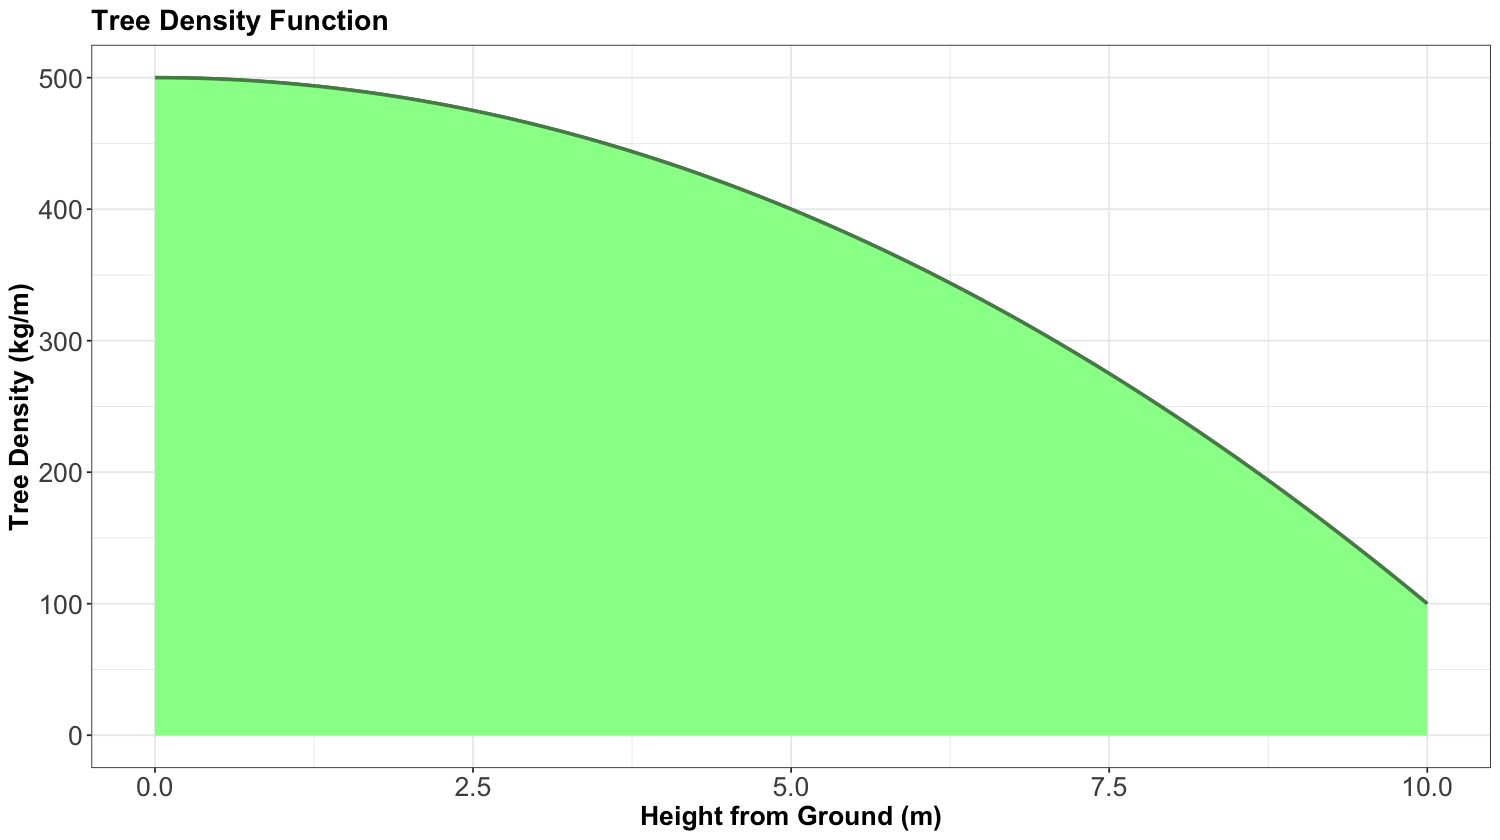

In [5]:
tree_plot +
  geom_ribbon(aes(ymin = 0, ymax = y), fill = "palegreen") +
  geom_line(color = "palegreen4", linewidth = 1)

## 3. Probability Density

So, hopefully, all that tree stuff had something to do with continuous probability distributions, right? Good news, it does! 

Let us consider a continuous random variable:

$$X = \text{Height of a person in meters.}$$

``` {figure} img/people.png
:height: 350px
:name: people
A sample of people
```

The notion of density from the tree analogy carries over to continuous probability. Just like we had the density (in $\text{kg/m}$) of the tree defined at every value of $x$ along the tree, we have a probability density $f_X(x)$ (in "probability per meter") of heights.

Not many people are more than $2 \text{ m}$ tall, so the probability density at a height equal to $2 \text{ m}$ will be lower than that at a height equal to $1.5 \text{ m}$. And, as with the tree analogy, we can compute the probability that a randomly selected person is between $1.5$ and $1.6 \text{ m}$ tall by taking the integral of the probability density:

$$P(1.5 \leq X \leq 1.6) = \int^{1.6}_{1.5} f_X(x) \text{d}x.$$

### 3.1. A Note on Units

Take a moment to pay close attention to the units in the previous example of a person's height. The "meters" part carries over perfectly from the tree analogy: the units of the random variable $X$. But the "kilograms" part **does not** carry over from the tree analogy. Here, the "stuff" we are measuring is probability, not weight. 

Technically, in this case, the density $f_X(x)$ has units of $1/\text{m}$ or, equivalently, $\text{m}^{-1}$. This is not the most intuitive unit type, but it is important. Remember, we wanted to ask questions like:

> What is the probability that a person's height is between $x = 1 \text{ m}$ and $x = 2 \text{ m}$?

When we write this as an integral

$$P(1 \leq X \leq 2) = \int_1^2 f_X(x) \text{d}x,$$

the units now work out, because $f_X(x)$ has units of $\text{m}^{-1}$ and $\text{d}x$ has units of $\text{m}$.

```{important} 
Recall, $\text{d}x$ is an infinitely tiny interval of $x$, measured in metres, so when we multiply them, we get a unitless result as expected.
```

The density as a function over the outcome space is called the **probability density function (PDF)**, usually abbreviated to just the **density**, and denoted as $f(\cdot)$. In the case of PDFs, we specify the random variable in the subscript to clarify what random variable this density represents -- for example, $f_X(x)$ is the density of random variable $X$. In the case of discrete random variables, you will see that the density is like a "*continuous cousin*" of the **probability mass function (PMF)**.

We can use the density to calculate probabilities of a range by integrating the density over that range: 

$$P(a < X < b) = \int_a^b f_X(x) \text{d}x.$$ 

This means that integrating over the entire range of possibilities for the random variable $X$ should give us 1:

 $$\int_{-\infty}^\infty f_X(x) \text{d}x = 1.$$

The integral above corresponds to the entire area under the density function.

Now, what if a random variable only ranges from, say, $0$ to $10$ -- is it a problem that we integrate from $-\infty$ to $+\infty$? Should not we say 

$$\int_{0}^{10} f_X(x) \text{d}x = 1$$ 

in this case? The answer is that these are the same thing. 

If a random variable ranges from $0$ to $10$, then we consider that $f_X(x) = 0$ outside the interval from $0$ to $10$. So, when we take the integral from $-\infty$ to $\infty$, most of that integral is over zero and reduces to the integral from $0$ to $10$.

In other words, for our tree density, we could have actually made a plot like this whose $y$-axis begins at $0 \text{ kg/m}$, showing the density from $-10 \text{ m}$ (underground) to $20 \text{ m}$ (in the sky above the tree):

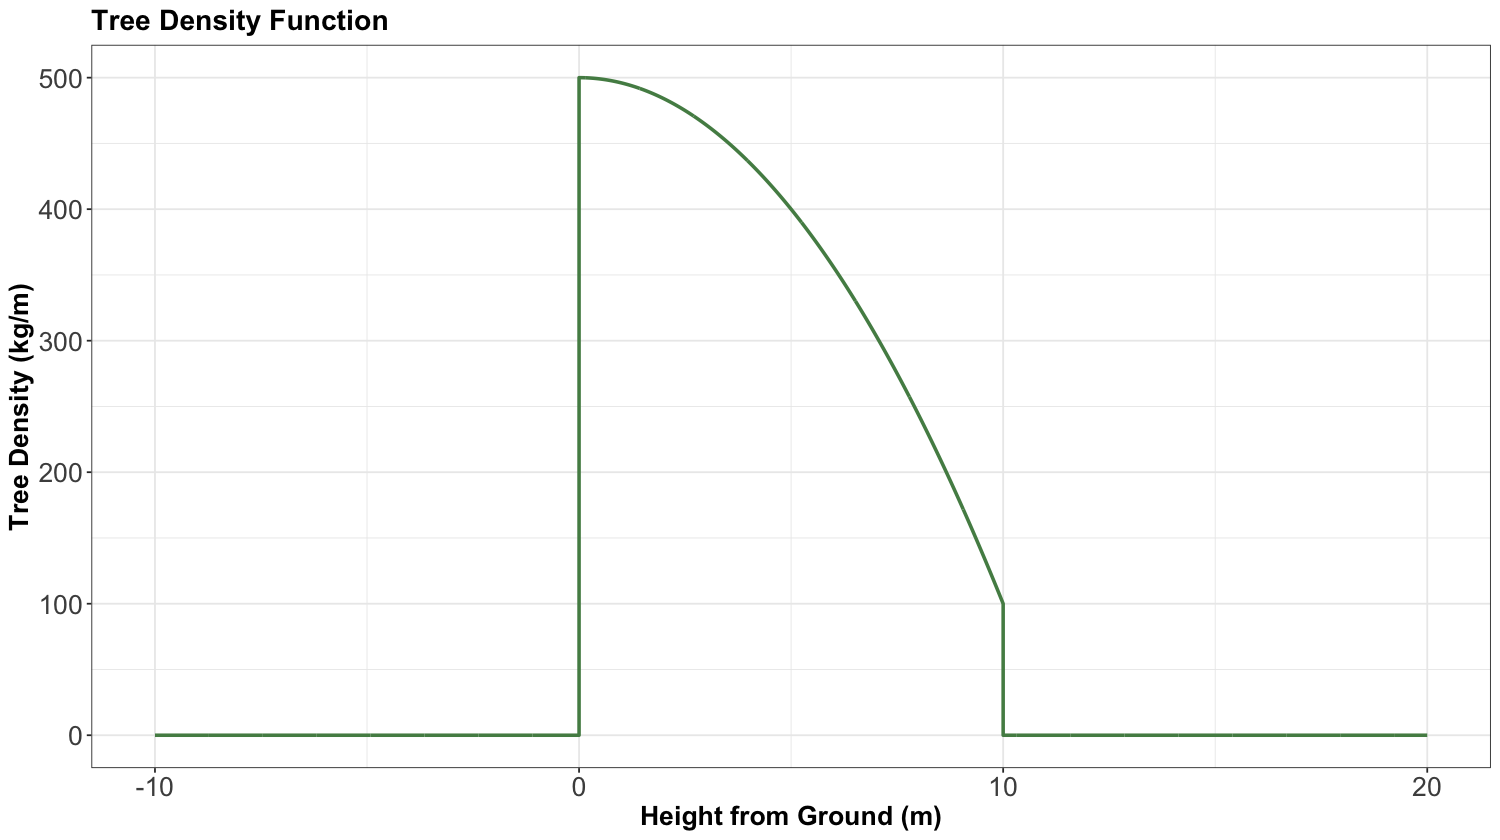

In [6]:
tree_density_2 <- tibble(
  x = c(seq(-10, 0, length = 1000), seq(0, 10, length = 1000), seq(10, 20, length = 1000)),
  y = c(rep(0, 1000), 500 - 4 * seq(0, 10, length = 1000)^2, rep(0, 1000))
)

ggplot(tree_density_2, aes(x, y)) +
  geom_line(color = "palegreen4", linewidth = 1) +
  labs(
    x = "Height from Ground (m)",
    y = "Tree Density (kg/m)"
  ) +
  theme_bw() +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold")
  ) +
  ggtitle("Tree Density Function")

### 3.2. Probability of a Particular Value

Let us answer the following question:

> What is the probability that a person is 1.5 meters tall?

That is $1.5000000000\ldots \text{ m}$. Just like the weight of a tree at a height equal to $5 \text{ m}$, this is $0$. In fact, any height has a probability of $0$ of occurring. But we can ask for the probability of a **range** of heights, like the probability that a person will be between $1.5$ and $1.6 \text{ m}$ tall. And now we can have non-zero probability -- just like the weight of the tree between $4.5$ and $5 \text{ m}$ off the ground.

### 3.3. Example: Low Purity Octane

Suppose you just ran out of gas, but luckily, right in front of a gas station! Or maybe not so lucky, since the gas station is called "*Low Purity Octane*." 

``` {figure} img/gas-pump.png
:height: 400px
:name: gas-pump
A gas pump
```

They tell you that the octane purity (as a proportion between $0$ and $1$) of their gasoline is random, and has the following density:

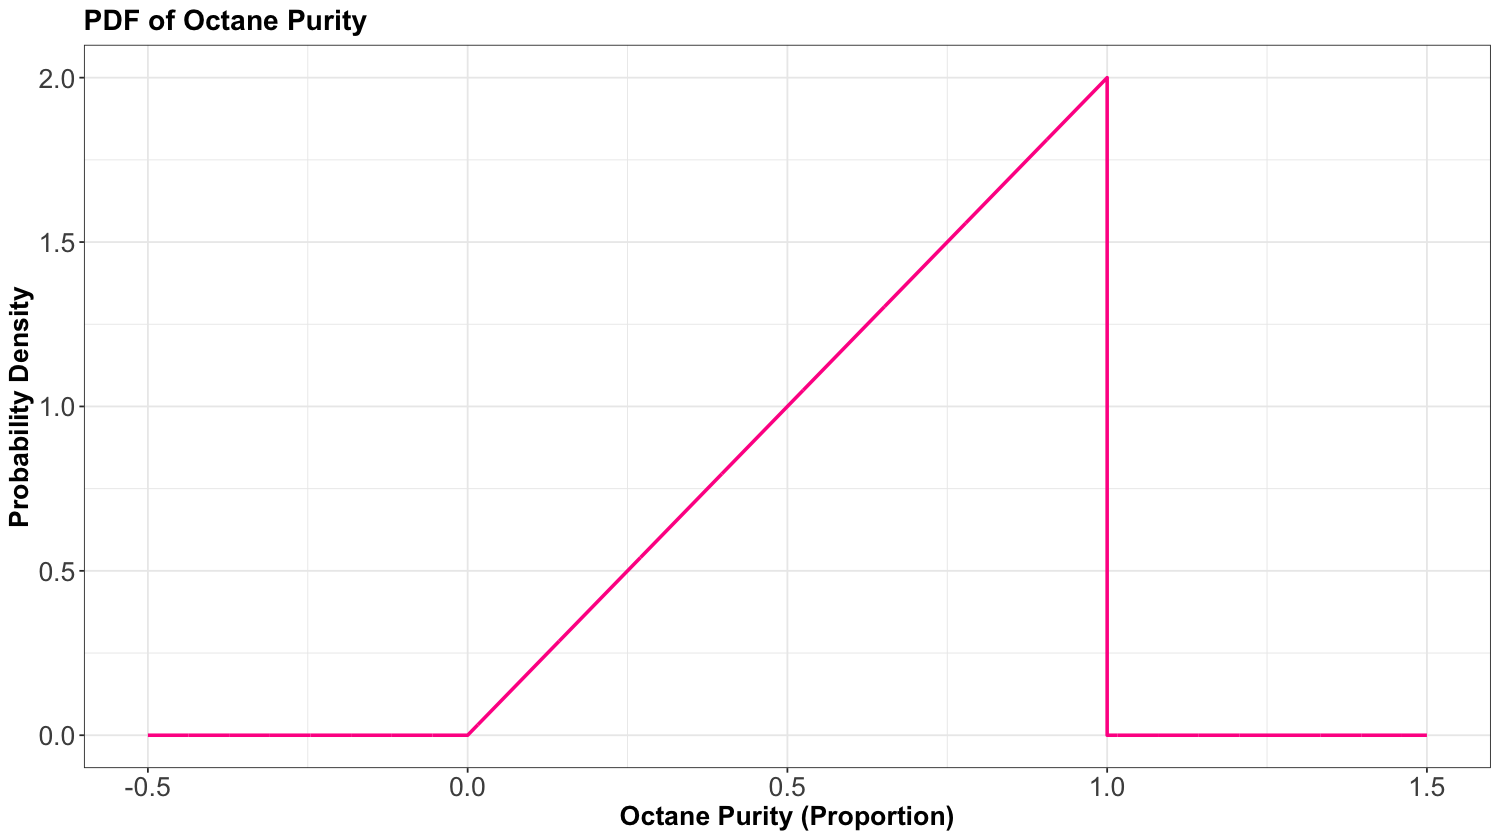

In [7]:
octane_density <- tibble(
  x = c(seq(-0.5, 0, length = 1000), seq(0, 1, length = 1000), seq(1, 1.5, length = 1000)),
  y = c(rep(0, 1000), 2 * seq(0, 1, length = 1000), rep(0, 1000))
)

octane_PDF <- ggplot(octane_density, aes(x, y)) +
  labs(
    x = "Octane Purity (Proportion)",
    y = "Probability Density"
  ) +
  theme_bw() +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold")
  ) +
  ggtitle("PDF of Octane Purity") +
  geom_line(color = "deeppink", linewidth = 1)

octane_PDF

Let 

$$X = \text{Octane purity as a proportion.}$$ 

Its PDF is the following:

```{math}
:label: octane-pdf
f_X(x) =
\begin{cases}
2x \quad \text{for} \quad 0 \leq x \leq 1 \\
0 \quad  \text{elsewhere.}
\end{cases}
```

Let us answer the following questions together:

```{exercise}
:label: lecture5-q1

Using the PDF, what is the probability of getting 25% purity? That is, 

$$P(X = 0.25).$$
```

```{exercise}
:label: lecture5-q2

The PDF {eq}`octane-pdf` evaluates to be $> 1$ in some places on the vertical axis. Does this mean that this is not a valid density? Why is the density in fact valid?
```

Now, let us proceed with some in-class questions via [**iClicker**](https://student.iclicker.com/).

```{exercise}
:label: lecture5-q3

Using the PDF {eq}`octane-pdf`, what is the probability of getting gas that is $< 50\%$ pure? That is, 

$$P(X < 0.5).$$

Select the correct option:

**A.** 0.75

**B.** 0.1

**C.** 0.25

**D.** 0.5
```

```{exercise}
:label: lecture5-q4

What is the probability of getting gas that is $\leq 50\%$ pure? That is, 

$$P(X \leq 0.5).$$

Select the correct option:

**A.** 0.25

**B.** 0.249

**C.** 0.749

**D.** 0.75
```

## 4. Distribution Properties

With continuous random variables, it becomes easier to expand our "toolkit" of how we describe a distribution or random variable using different **central tendency and uncertainty measures**.

### 4.1. Mean, Variance, Mode, and Entropy

These are the distribution measures we have already seen, and they indeed extend to the continuous case. Note that mode and entropy can also be defined in continuous cases. However, since mode and entropy ignore the numeric property of continuous random variables, they tend not to be heavily used in continuous cases. 

```{admonition} Definition of Mode in Continuous Random Variables
:class: tip
The outcome having the highest density. That is, for a continuous random variable $X$ with PDF $f_X(x)$:

$$\text{Mode}(X) = {\arg \max}_x f_X(x).$$
```

````{admonition} Definition of Entropy in Continuous Random Variables
:class: tip
The entropy can be defined by replacing the sum in the finite case with an integral:

```{math}
:label: entropy-continuous
H(X) = -\int_x f_X(x) \log [f_X(x)] \text{d}x.
```

Note that, in Statistics, the $\log(\cdot)$ notation implicates base $e$.
````

Instead, we prefer to describe a continuous random variable using properties that **inform us about distances around the PDF $f_X(x)$**. The mean and variance are two measures of central tendency and uncertainty. The only difference with a continuous random variable is in the distribution-based definition, where the sum becomes an integral.

Retaking Equation {eq}`mean-continuous`, in the case of the **mean** we have

```{math}
:label: mean-continuous-2
\mathbb{E}(X) = \int_x x \, f_X(x) \text{d}x.
```

```{important} 
The mean ends up being the "*center of mass*" of the PDF, meaning that you could "balance" the density function on this single point without it "toppling over due to gravity." Note the mean may be best interpreted as the long-run **sample mean** {eq}`sample-mean`.
```

````{admonition} Alternative Definition of Variance in Continuous Random Variables
:class: tip
If $X$ is continuous, with $f_X(x)$ as a PDF, then an alternative definition of the variance is

```{math}
:label: alt-variance-continuous
\text{Var}(X) = \mathbb{E}[(X - \mu_X)^2] = \int_x (x - \mu_X) ^ 2 \, f_X(x) \text{d}x.
```

The term $\mu_X$ is equal to $\mathbb{E}(X)$ from Equation {eq}`mean-continuous-2`. The variance is the expected squared distance from the mean $\mu_X$.

Note that the identity 

$$\text{Var}(X) = \mathbb{E}(X^2) - [\mathbb{E}(X)]^2$$ 

from Equation {eq}`variance`, which we used in the discrete case, holds in the continuous case as well.
````

Let us recheck the PDF of the "*Low Purity Octane*" gas station:

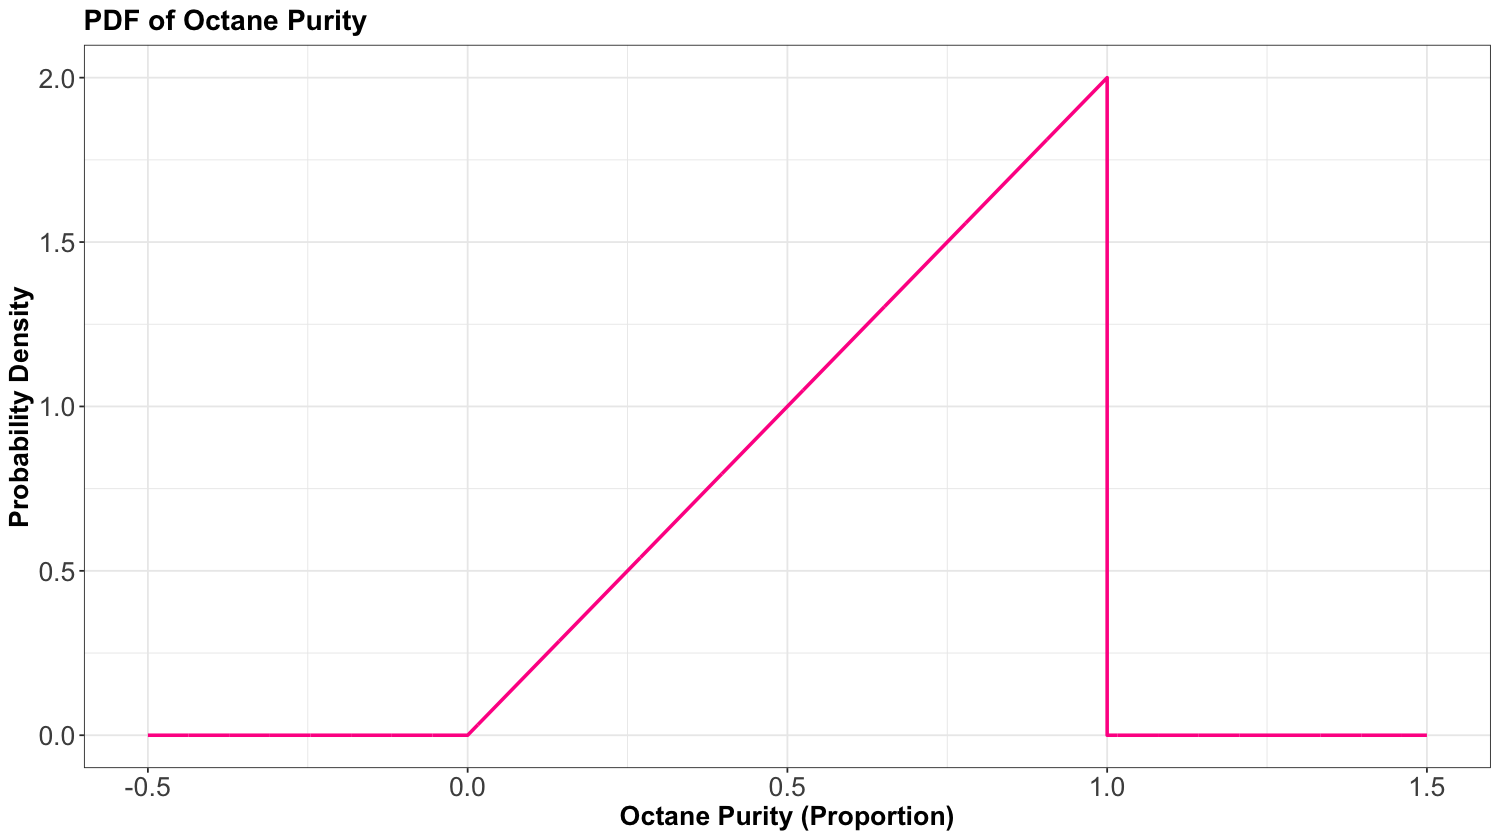

In [8]:
octane_PDF 

From the above PDF, note we have the following:

- The mode is $1$ (the highest purity possible on the $x$-axis!) which corresponds to $f_X(x) = 2.0$ on the $y$-axis.
- Omitting the Calculus steps via Equation {eq}`entropy-continuous`, the entropy works out to be

```{math}
\begin{align*}
H(X) &= -\int_0^1  f_X(x) \log [f_X(x)] \text{d}x \\
&= -\int_0^1 2x \log(2x) \text{d}x \\
& \approx -0.1931.
\end{align*}
```

- The entropy is **negative**. Entropy for discrete distributions can **never** be negative. The continuous setting can be strange, but we will just ignore this. We will not really use entropy for continuous variables throughout the statistical topics of MDS.
- The mean ends up being not a very good purity (especially as compared to the mode!), and is

```{math}
\begin{align*}
\mathbb{E}(X) &= \int_0^1 x \, f_X(x) \text{d}x = \int_0^1 x (2x) \text{d}x = \int_0^1 2x^2 \text{d}x \\
&= \frac{2x^3}{3} \Big|_{0}^{1} \\
&= \frac{2(1)^3}{3} - \frac{2(0)^3}{3} \\
&= \frac{2}{3} \\
&= 0.666.
\end{align*}
```

- The variance ends up being

```{math}
\begin{align*}
\text{Var}(X) &= \int_0^1 (x - \mu_X)^2 \, f_X(x) \text{d}x = \int_0^1 \left[ x - \mathbb{E}(X) \right]^2 \, f_X(x) \text{d}x = \int_0^1 \left( x - \frac{2}{3} \right)^2 2x \text{d}x \\
&= \int_0^1 \left( x^2 - \frac{4}{3} x + \frac{4}{9} \right) 2x \text{d}x \\
&= \int_0^1 \left( 2x^3 - \frac{8}{3} x^2 + \frac{8}{9} x \right) \text{d}x \\
&= \left( \frac{2}{4} x^4 - \frac{8}{9} x^3 + \frac{8}{18} x^2 \right) \Big|_{0}^{1} \\
&= \frac{2}{4} - \frac{8}{9} + \frac{8}{18} \\
&= \frac{1}{18} \\ 
&= 0.056.
\end{align*}
```

### 4.2. Median

Let us check its formal definition.

````{admonition} Definition of Median
:class: tip
Let $X$ be a numeric random variable. The median $\text{M}(X)$ is the outcome for which there is a **50-50 chance** of seeing a greater or lesser value. So, its distribution-based definition satisfies 

$$P[X \leq \text{M}(X)] = 0.5.$$

Note its empirically-based definition is the "middle value" after sorting the outcomes from the smallest to the largest value.
````

The median is perhaps best for making a single decision about a random outcome. Making a decision is most straightforward when the possibilities are reduced to two equally likely outcomes, and this is exactly what the median does. For example, if the median time to complete a hike is 2 hours, then you know there is a 50-50 chance that the hike will take over 2 hours. Suppose you are instead told that the mean is 2 hours. In that case, this only tells us that the total amount of hiking time done by a bunch of people will be as if everyone takes 2 hours to do the hike -- this is still useful for deciding whether or not you should do the hike but is more convoluted. 

Using the purity example at "*Low Purity Octane*," the median is about $0.7071$:

```{math}
\begin{align*}
P[X \leq \text{M}(X)] &= 0.5 \\
&= \int_0^{\text{M}(X)} f_X(x) \text{d}x = \int_0^{\text{M}(X)} 2x \text{d}x \\
&= x^2 \Big|_{0}^{\text{M}(X)} \\
&= [\text{M}(X)]^2.
\end{align*}
```

Thus, we have:

```{math}
\begin{gather*}
[\text{M}(X)]^2 = 0.5 \\
\text{M}(X) = \sqrt{0.5} = 0.7071.
\end{gather*}
```

This median is represented as a vertical dashed line in the plot below. Note that on the left-hand side of this dashed line, we have a probability of $0.5$ (i.e., the area under the PDF). On the right-hand side of this dashed line, we also have a probability of $0.5$ (i.e., the area under the PDF).

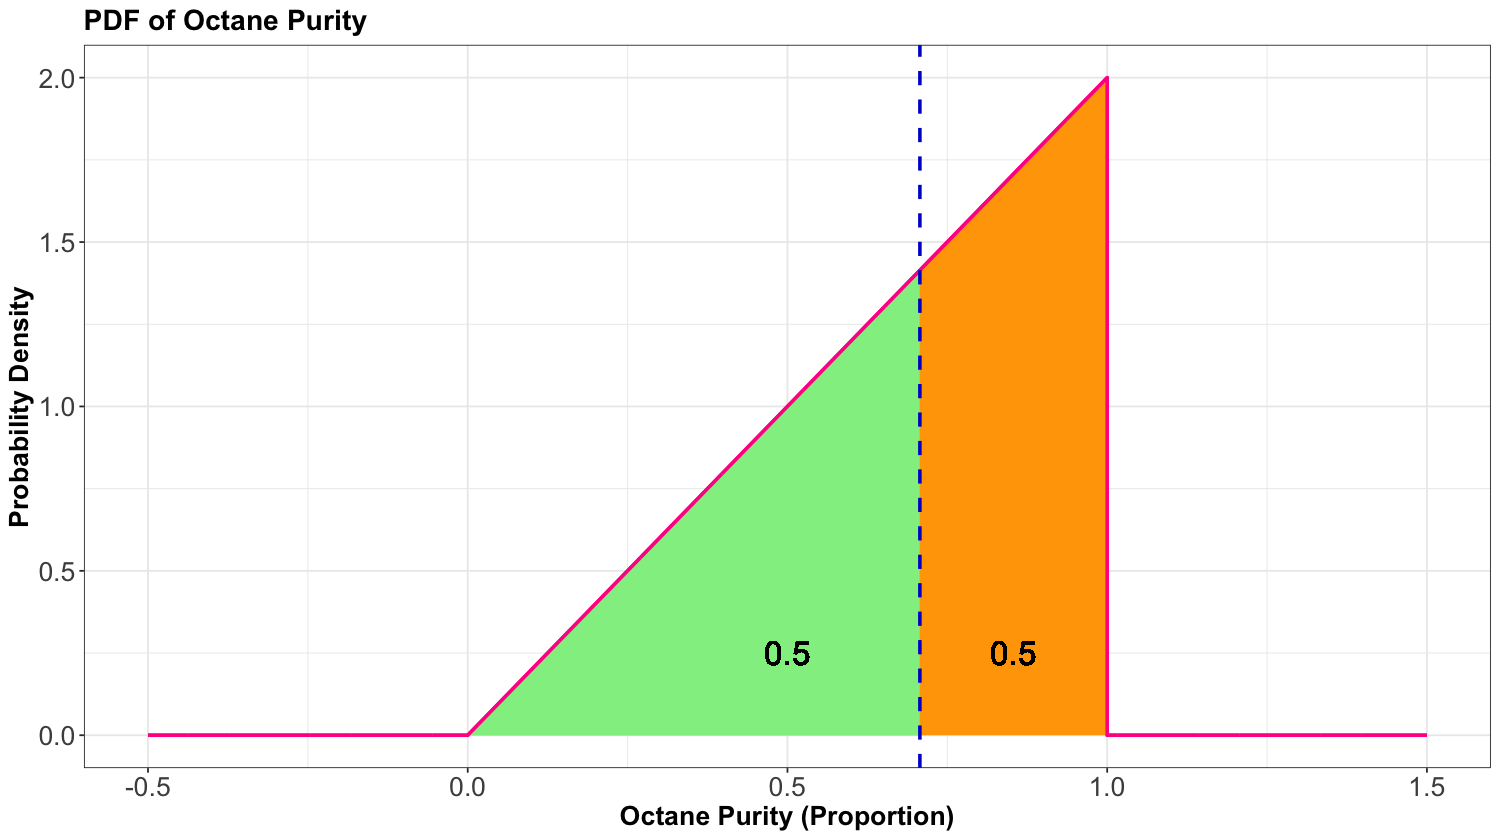

In [9]:
octane_PDF +
  geom_area(mapping = aes(x = ifelse(x < 1 & x > sqrt(0.5), x, 0)), fill = "orange") +
  geom_area(mapping = aes(x = ifelse(x < sqrt(0.5), x, 0)), fill = "lightgreen") +
  geom_text(x = 0.5, y = 0.25, label = "0.5", size = 7) +
  geom_text(x = 1 - (1 - sqrt(0.5)) / 2, y = 0.25, label = "0.5", size = 7) +
  geom_line(color = "deeppink", linewidth = 1) +
  geom_vline(
    xintercept = sqrt(0.5),
    linetype = "dashed",
    color = "mediumblue",
    linewidth = 1
  )

### 4.3. Quantiles

More general than a median is a **quantile**. Let us check its formal definition.

````{admonition} Definition of Quantile
:class: tip
Let $X$ be a numeric random variable. A $p$-quantile $Q(p)$ is the outcome with a probability $p$ of getting a smaller outcome. So, its distribution-based definition satisfies 

$$P[X \leq Q(p)] = p.$$ 

The median is a special case, and is the $0.5$-quantile.
````

For example, the $0.25$-quantile of octane purity at "*Low Purity Octane*" is $0.5$:

```{math}
\begin{align*}
P[X \leq Q(0.25)] &= 0.25 \\
&= \int_0^{Q(0.25)} f_X(x) \text{d}x = \int_0^{Q(0.25)} 2x \text{d}x \\
&= x^2 \Big|_{0}^{Q(0.25)} \\
&= [Q(0.25)]^2.
\end{align*}
```

Hence, we have:

```{math}
\begin{gather*}
[Q(0.25)]^2 = 0.25 \\
Q(0.25) = \sqrt{0.25} = 0.5.
\end{gather*}
```

This $Q(0.25)$ is represented as a vertical dashed line in the plot below. Note that on the left-hand side of this dashed line, we have a probability of $0.25$ (i.e., the area under the PDF). On the right-hand side of this dashed line, we also have a probability of $0.75$ (i.e., the area under the PDF).

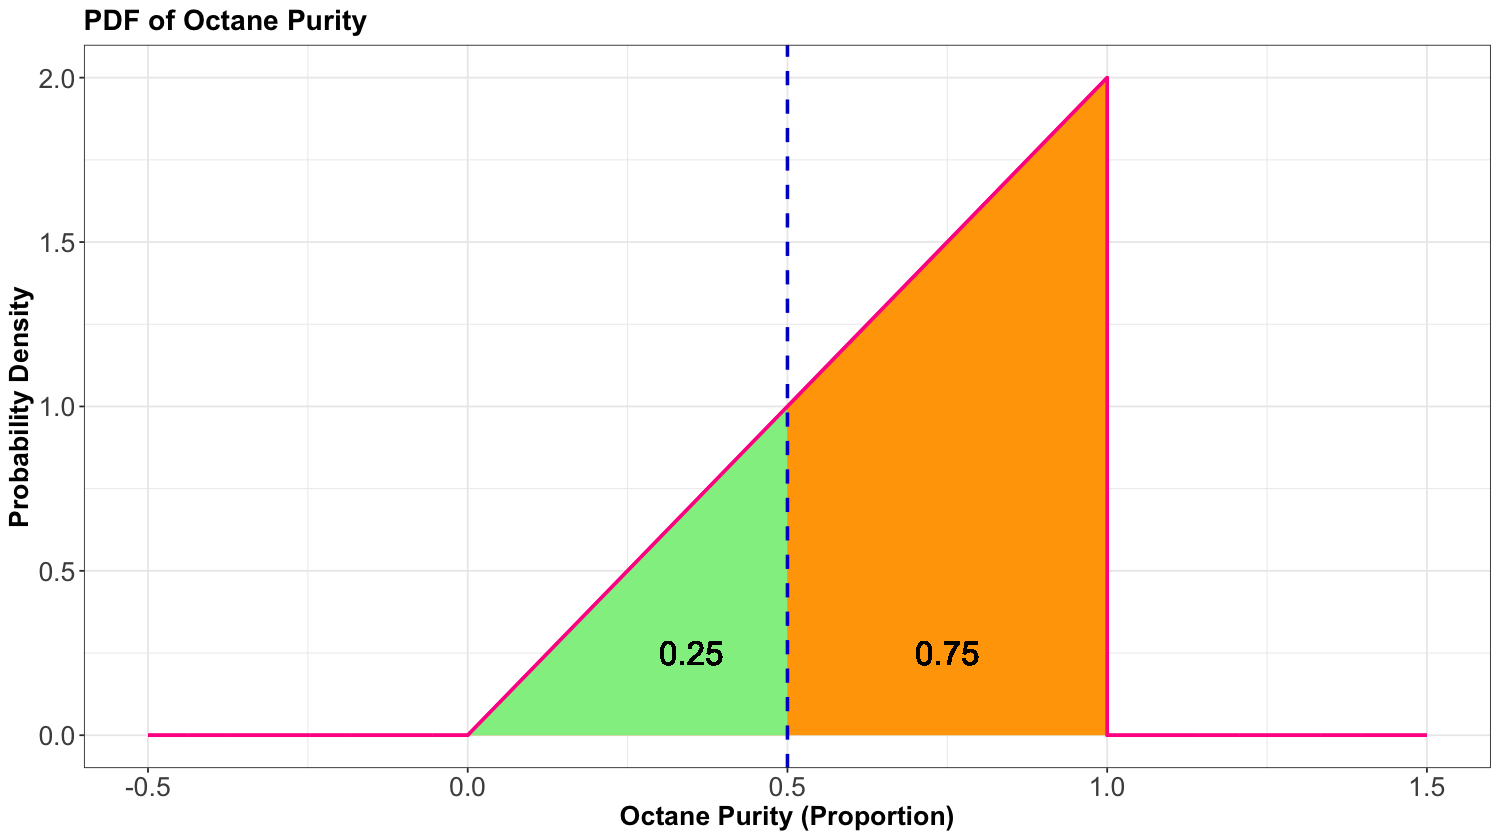

In [10]:
octane_PDF +
  geom_area(mapping = aes(x = ifelse(x < 1 & x > sqrt(0.25), x, 0)), fill = "orange") +
  geom_area(mapping = aes(x = ifelse(x < sqrt(0.25), x, 0)), fill = "lightgreen") +
  geom_text(x = 0.35, y = 0.25, label = "0.25", size = 7) +
  geom_text(x = 1 - (1 - sqrt(0.25)) / 2, y = 0.25, label = "0.75", size = 7) +
  geom_line(color = "deeppink", linewidth = 1) +
  geom_vline(
    xintercept = sqrt(0.25),
    linetype = "dashed",
    color = "mediumblue",
    linewidth = 1
  )

```{admonition} Note
:class: warning
An empirically-based definition of the $p$-quantile is the $np$'th largest (rounded up) observation in a sample of size $n$.
```

### 4.4. Prediction Intervals

It is often useful to communicate an interval for which a random outcome will fall in with a pre-specified probability $p$. Such an interval is called a $p \times 100\%$ **prediction interval**. 

Usually, we set this up in such a way that there is a $p$ chance of landing in the interval, a $\frac{1-p}{2}$ chance of exceeding the interval, and $\frac{1-p}{2}$ chance of undershooting the interval. You can calculate the lower limit of this interval as the $\frac{1 - p}{2}$-quantile and the upper limit as the $\frac{1 + p}{2}$-quantile.

For instance, a 90% prediction interval for the purity of gasoline at "*Low Purity Octane*" is $[0.2236, 0.9746]$, composed of the $0.05$ and $0.95$-quantiles.

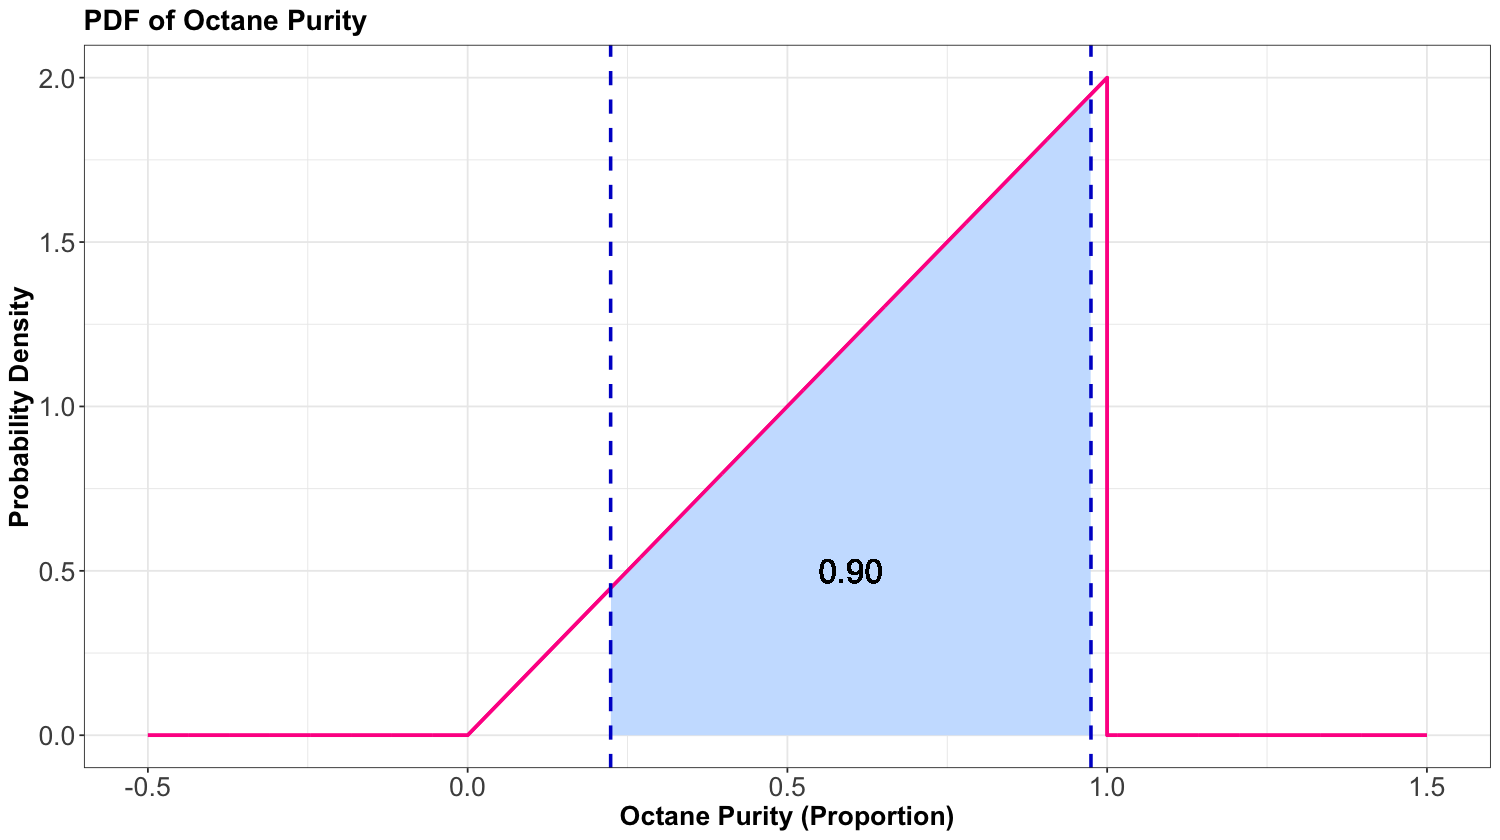

In [11]:
suppressWarnings(print(octane_PDF +
  geom_area(mapping = aes(x = ifelse(x < sqrt(0.95) & x > sqrt(0.05), x, NA)), fill = "lightsteelblue1") +
  geom_line(color = "deeppink", linewidth = 1) +
  geom_vline(
    xintercept = sqrt(0.05),
    linetype = "dashed",
    color = "mediumblue",
    linewidth = 1
  ) +
  geom_vline(
    xintercept = sqrt(0.95),
    linetype = "dashed",
    color = "mediumblue",
    linewidth = 1
  ) +
  geom_text(x = (sqrt(0.05) + sqrt(0.95)) / 2, y = 0.5, label = "0.90", size = 7)))

### 4.5. Skewness

Skewness measures how "*lopsided*" a distribution is, as well as the direction of the skew. 

- If the density is symmetric about a point, then the skewness is $0$.
- If the density is more "spread-out" towards the right/positive values, then the distribution is said to be **right-skewed** (**positive skewness**).
- If the density is more "spread-out" towards the left/negative values, then the distribution is said to be **left-skewed** (**negative skewness**).

Below, we have PDFs of octane purity with these three types of skewness.

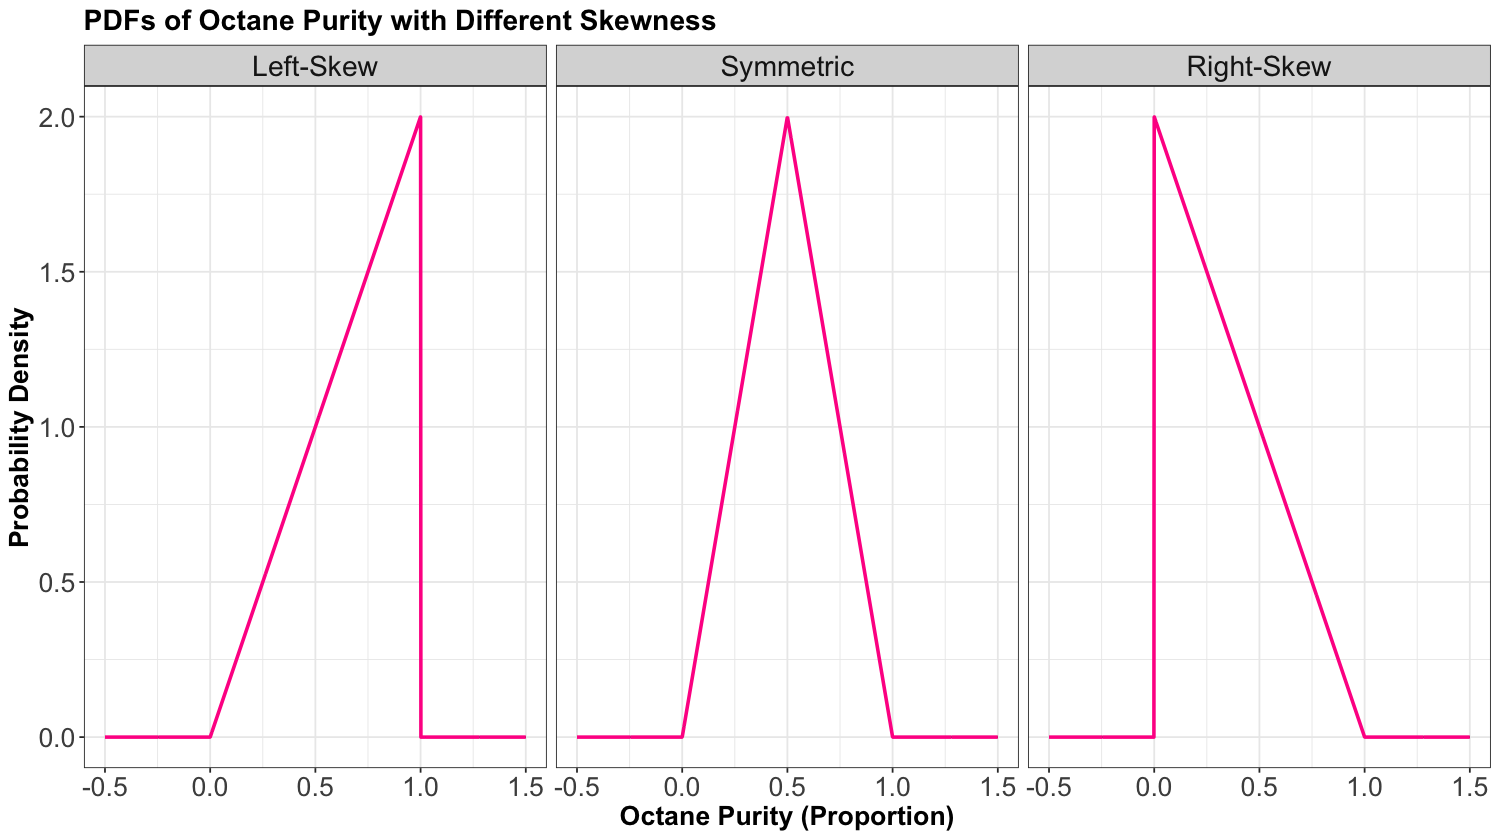

In [12]:
tibble(
  rng = seq(-0.5, 1.5, length.out = 1000),
  `Left-Skew` = octane$ddist(rng),
  Symmetric = octane$ddist_symm(rng),
  `Right-Skew` = octane$ddist_right(rng)
) %>%
  pivot_longer(
    cols = c("Left-Skew", "Symmetric", "Right-Skew"),
    values_to = "Density",
    names_to = "type"
  ) %>%
  mutate(type = fct_relevel(type, "Left-Skew", "Symmetric", "Right-Skew")) %>%
  mutate(
    mean = case_when(
      type == "Left-Skew" ~ 2 / 3,
      type == "Symmetric" ~ 1 / 2,
      type == "Right-Skew" ~ 1 / 3
    ),
    median = case_when(
      type == "Left-Skew" ~ sqrt(0.5),
      type == "Symmetric" ~ 1 / 2,
      type == "Right-Skew" ~ 1 - sqrt(0.5)
    )
  ) %>%
  ggplot(aes(rng, Density)) +
  facet_wrap(~type) +
  geom_line() +
  theme_bw() +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold"),
    strip.text = element_text(size = 17)
  ) +
  ggtitle("PDFs of Octane Purity with Different Skewness") +
  geom_line(color = "deeppink", linewidth = 1) +
  labs(
    x = "Octane Purity (Proportion)",
    y = "Probability Density"
  )

````{admonition} Definition of Skewness
Let $X$ be a numeric random variable: 

- If $X$ is discrete, with $P(X = x)$ as a PMF, then skewness can be defined as

$$\text{Skewness}(X) = \mathbb{E} \left[ \left( \frac{X - \mu_X}{\sigma_X} \right)^3 \right] = \displaystyle \sum_x \left( \frac{x - \mu_X}{\sigma_X} \right)^3 \cdot P(X = x).$$ 

- If $X$ is continuous, with $f_X(x)$ as a PDF, then 

$$\text{Skewness}(X) = \mathbb{E} \left[ \left( \frac{X - \mu_X}{\sigma_X} \right)^3 \right] = \displaystyle \int_x \left( \frac{x - \mu_X}{\sigma_X} \right)^3 \cdot f_X(x) \text{d}x.$$ 

where $\mu_X = \mathbb{E}(X)$ as in Equations {eq}`mean-discrete` if $X$ is discrete and {eq}`mean-continuous`  if $X$ is continuous. On the other hand, $\sigma_X = \text{SD}(X)$ as in Equation {eq}`sd`.
````

### 4.6. Special Quantiles (Optional Section)

Some quantiles have a special name:

- The $0.25$, $0.5$, and $0.75$-quantiles are called **quartiles**. They are sometimes named the first, second, and third quartiles, respectively.
- The $0.01$, $0.02$, ..., and $0.99$-quantiles are called **percentiles**. Sometimes, the $p$-quantile will be called the $100p$th percentile; for example, the $40$th percentile is the $0.4$-quantile.
- Less commonly, there are even **deciles**, as the $0.1$, $0.2$, ..., and $0.9$-quantiles.

## 5. Representing Distributions

So far, we have been saying that a PMF or a PDF is a distribution. Actually, there are more ways we can represent a distribution besides the PMF or PDF. This section takes a deeper dive into alternative ways a probability distribution can be represented and their usefulness. Keep in mind that all of these representations capture **everything** about a distribution, meaning that if one of them is given, the other ones can be derived.

### 5.1. Cumulative Distribution Function

Let us check its formal definition.

````{admonition} Definition of Cumulative Distribution Function
Let $X$ be a continuous random variable with PDF $f_X(x)$. The cumulative distribution function (CDF) is usually denoted by $F(\cdot)$ and is defined as 

$$F_X(x) = P(X \leq x).$$

We can calculate the CDF by 

```{math}
:label: cdf
F_X(x) = \int_{-\infty}^x f_X(t) \, \text{d}t.
```
````

#### 5.1.1. Digression on Mathematical Notation

Note the use of the variable $t$ in Equation {eq}`cdf`. We do not want to do the integral over $x$ because the variable $x$ has a meaning **outside the integral**. So we need to pick another letter that exists only for the integral itself; here, we choose $t$. One can make an **analogy** to programming: if you have a `for` loop iterating over some variable, you do not want a variable with the same name *outside* the loop. That would cause problems:

In [13]:
x <- 999

for (x in 1:5) {
  print(x)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


In [14]:
print(x)

[1] 5


Oh no! Our friend `x = 999` got **overwritten** by the loop variable. This is solved by using another name for the loop variable:

In [15]:
x <- 999

for (t in 1:5) {
  print(t)
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


In [16]:
print(x)

[1] 999


Great! `x` lives to see another day. Likewise with our math, it would not be good form to say 

$$F_X(x) = \int_{-\infty}^x f_X(x) \, \text{d}x,$$ 

so we say 

$$F_X(x) = \int_{-\infty}^x f_X(t) \, \text{d}t.$$

The CDF $F_X(\cdot)$, evaluated at some $x$, is the integral from $-\infty$ to $x$ of the PDF. To write down that integral as math, we need to introduce a variable $t$ that only exists inside the integral, just like our loop variable `t`.

#### 5.1.2. Back to Business

Let us get back to it. Since we said the CDF is the integral of the PDF, the PDF is the derivative of the CDF. Notice that while the PDF has units of $1 / \text{units}$ of $x$, for example $1 / \text{m}$ if $X$ is a distance or height, **the CDF has no units** because it evaluates to a probability. 

```{important} 
When does the CDF exist? Almost all the time, except that the CDF does not exist for categorical variables since there is no such thing as "*less than*" or "*greater than*." The CDF is still defined for discrete random variables but has a jump-discontinuity at the discrete values. 
```

Before moving on, let us introduce another example. Again, you would like to get a handle on your monthly finances. It turns out your monthly expenses have the following PDF:

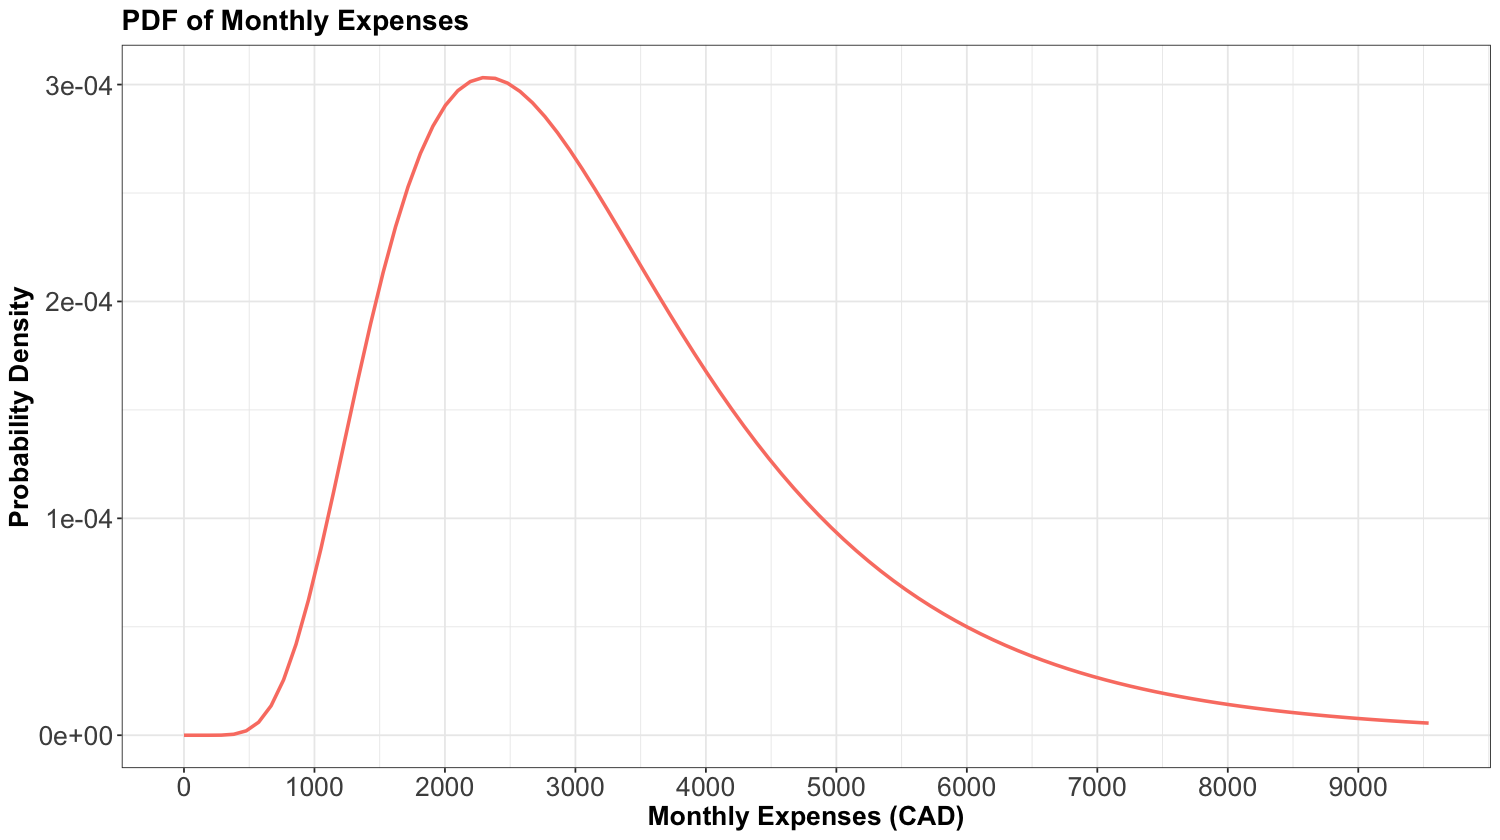

In [17]:
expenses_PDF <- expense$plot_ddist +
  labs(
    x = "Monthly Expenses (CAD)",
    y = "Probability Density"
  ) +
  theme_bw() +
  theme(
    plot.title = element_text(size = 17, face = "bold"),
    axis.text = element_text(size = 16),
    axis.title = element_text(size = 16, face = "bold")
  ) +
  ggtitle("PDF of Monthly Expenses") + 
  scale_x_continuous(breaks = seq(0, 9000, 1000))
expenses_PDF

Now, here are the CDFs of the octane purity, monthly expenses, and length of stay (from previous lectures). We also include the PDF for octane purity and monthly expenses.

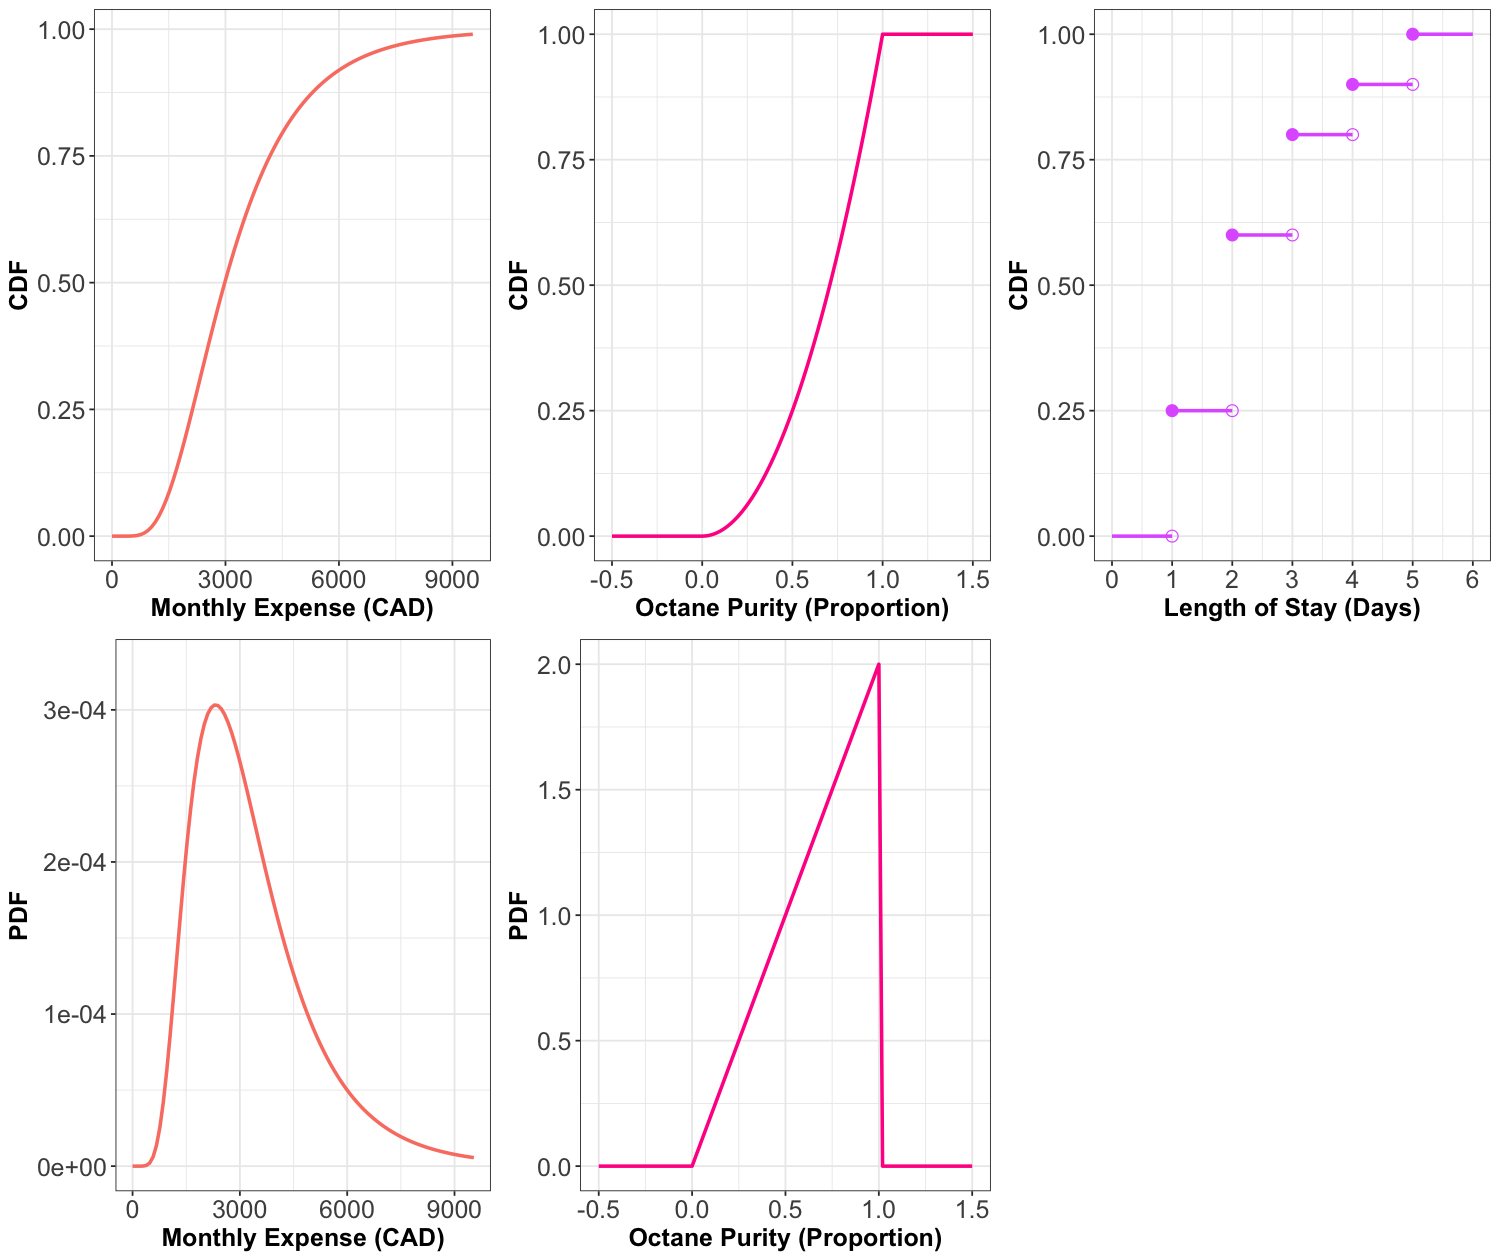

In [18]:
options(repr.plot.height = 10.5)

suppressMessages(suppressWarnings(print(cowplot::plot_grid(
  tibble(x = expense$qdist(c(0, 0.99))) %>%
    ggplot(aes(x)) +
    stat_function(fun = expense$pdist, color = "salmon", linewidth = 1) +
    theme_bw() +
    ylab("CDF") +
    xlab("Monthly Expense (CAD)") +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ) + 
  scale_x_continuous(breaks = seq(0, 9000, 3000)),
  tibble(x = c(-0.5, 1.5)) %>%
    ggplot(aes(x)) +
    stat_function(fun = octane$pdist, color = "deeppink", linewidth = 1) +
    theme_bw() +
    labs(
      x = "Octane Purity (Proportion)",
      y = "CDF"
    ) +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  ggplot(los$pmf) +
    geom_segment(aes(x = left, y = lag(cdf), xend = right, yend = lag(cdf)), color = "mediumorchid1", linewidth = 1) +
    geom_point(
      data = filter(los$pmf, left != -Inf, ndays != 6),
      mapping = aes(x = right, y = cdf), color = "mediumorchid1", size = 3
    ) +
    geom_point(
      data = filter(los$pmf, ndays != 6),
      mapping = aes(x = right, y = lag(cdf)), shape = 1,
      color = "mediumorchid1", size = 3
    ) +
    scale_y_continuous("CDF", limits = c(0, 1)) +
    scale_x_continuous("Length of Stay (Days)", limits = c(0, 6), breaks = 0:6) +
    theme_bw() +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  tibble(x = expense$qdist(c(0, 0.99))) %>%
    ggplot(aes(x)) +
    stat_function(fun = expense$ddist, color = "salmon", linewidth = 1) +
    theme_bw() +
    ylab("pdf") +
    scale_y_continuous("PDF", limits = c(0, 3.3e-4)) +
    xlab("Monthly Expense (CAD)") +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ) + 
  scale_x_continuous(breaks = seq(0, 9000, 3000)),
  tibble(x = c(-0.5, 1.5)) %>%
    ggplot(aes(x)) +
    stat_function(fun = octane$ddist, color = "deeppink", linewidth = 1) +
    theme_bw() +
    labs(
      x = "Octane Purity (Proportion)",
      y = "PDF"
    ) +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  nrow = 2
))))

Think about the PDFs as derivatives of the CDFs and the CDFs as integrals of PDFs. Being able to mentally jump back and forth between a PDF and a CDF is a useful skill, but it takes practice. There are specific patterns to look for, like the fact that when the CDF is flat, that means the PDF is zero (because the derivative of a constant is zero; or, put another way, $P(X \leq x)$ is not increasing as you change $x$, so those values of $X$ must not be possible).

For the discrete CDF, a hollow point is a limiting point -- the CDF does not evaluate to that point. Note that jump discontinuities in a CDF are usually connected with a straight vertical line, which we will do from now on after this plot. I did not plot the PDF for the length of stay because it is a discrete variable, and we will say it has a PMF rather than a PDF.

#### 5.1.3. What Makes a Valid CDF?

In order for a function $F(\cdot)$ to be a valid CDF, the function needs to satisfy the following requirements:

1. Must never decrease.
2. It must never evalute to be $< 0$ or $> 1$. 
3. $F_X(x) \rightarrow 0$ as $x \rightarrow -\infty$.
4. $F_X(x) \rightarrow 1$ as $x \rightarrow \infty$.

#### 5.1.4. Probability that $X$ is Between $a$ and $b$

For a continuous random variable $X$ with PDF $f_X(x)$, we established that the probability of $X$ being between $a$ and $b$ is 

$$P(a \leq X \leq b) = \int_a^b f_X(x)\text{d}x.$$

We can connect the dots with our new definition of a CDF from Equation {eq}`cdf`. First,

$$P(a \leq X \leq b) = P(X \leq b) - P(X \leq a)$$

because if $X \leq b $ but not $\leq a$ then it must be that $a \leq X \leq b$. But now we can write these two terms using the CDF:

$$P(a \leq X \leq b) = P(X \leq b) - P(X \leq a) = F_X(b) - F_X(a).$$

Now, plugging in the definition of the CDF as the integral of the PDF,

$$P(a \leq X \leq b) = \int_{-\infty}^b f_X(x) \, \text{d}x - \int_{-\infty}^a f_X(x) \, \text{d}x=\int_{a}^b f_X(x) \, \text{d}x.$$

This is good -- everything checks out in an internally consistent way.

### 5.2. Survival Function 

Let us check its formal definition.

````{admonition} Definition of Survival Function
Let $X$ be a continuous random variable. The **survival function** $S(\cdot)$ is the CDF {eq}`cdf` "*flipped upside down*". For this random variable $X$, the survival function is defined as

```{math}
:label: survival
S_X(x) = P(X > x) = 1 - F_X(x).
```
````

```{admonition} Note
:class: warning
The name of the survival function {eq}`survival` comes from **Survival Analysis** (to be covered in *DSCI 562*), where $X$ is interpreted as a "*time of death*", so that the survival function is the probability of surviving beyond $x$. Aside from Survival Analysis, the survival function is also useful for Extreme Value Theory.
```

Here are the survival functions of our three examples with the CDFs plotted underneath for visual comparison:

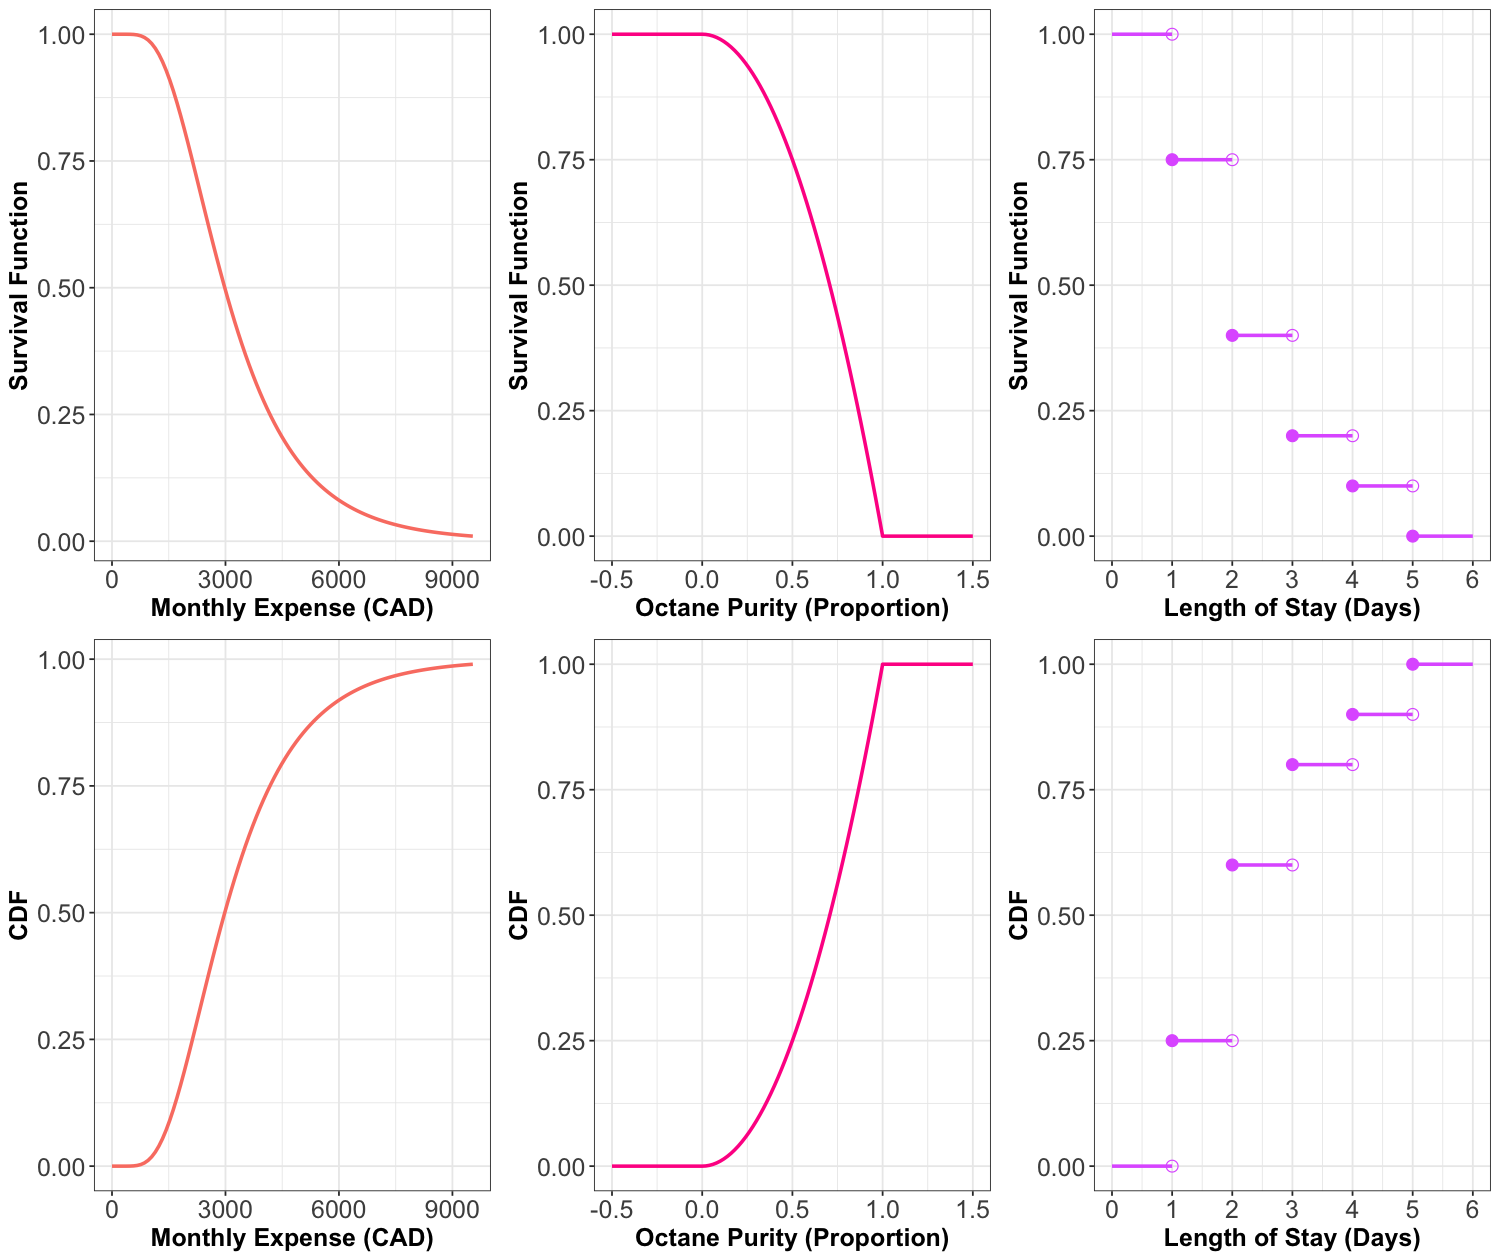

In [19]:
sf_layers <- list(
  ylab("Survival Function"),
  theme_bw()
)
suppressMessages(suppressWarnings(print(cowplot::plot_grid(
  tibble(x = expense$qdist(c(0, 0.99))) %>%
    ggplot(aes(x)) +
    stat_function(fun = function(x) 1 - expense$pdist(x), color = "salmon", linewidth = 1) +
    xlab("Monthly Expense (CAD)") +
    sf_layers +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ) + 
  scale_x_continuous(breaks = seq(0, 9000, 3000)),
  tibble(x = c(-0.5, 1.5)) %>%
    ggplot(aes(x)) +
    stat_function(fun = function(x) 1 - octane$pdist(x), color = "deeppink", linewidth = 1) +
    sf_layers +
    xlab("Octane Purity (Proportion)") +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  ggplot(los$pmf) +
    geom_segment(aes(x = left, y = 1 - lag(cdf), xend = right, yend = 1 - lag(cdf)), color = "mediumorchid1", linewidth = 1) +
    geom_point(
      data = filter(los$pmf, left != -Inf, ndays != 6),
      mapping = aes(x = right, y = 1 - cdf), color = "mediumorchid1", size = 3
    ) +
    geom_point(
      data = filter(los$pmf, ndays != 6),
      mapping = aes(x = right, y = 1 - lag(cdf)), shape = 1, color = "mediumorchid1", size = 3
    ) +
    scale_y_continuous("Survival Function", limits = c(0, 1)) +
    scale_x_continuous("Length of Stay (Days)", limits = c(0, 6), breaks = 0:6) +
    theme_bw() +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  tibble(x = expense$qdist(c(0, 0.99))) %>%
    ggplot(aes(x)) +
    stat_function(fun = expense$pdist, color = "salmon", linewidth = 1) +
    theme_bw() +
    ylab("CDF") +
    xlab("Monthly Expense (CAD)") +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ) + 
  scale_x_continuous(breaks = seq(0, 9000, 3000)),
  tibble(x = c(-0.5, 1.5)) %>%
    ggplot(aes(x)) +
    stat_function(fun = octane$pdist, color = "deeppink", linewidth = 1) +
    theme_bw() +
    labs(
      x = "Octane Purity (Proportion)",
      y = "CDF"
    ) +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  ggplot(los$pmf) +
    geom_segment(aes(x = left, y = lag(cdf), xend = right, yend = lag(cdf)), color = "mediumorchid1", linewidth = 1) +
    geom_point(
      data = filter(los$pmf, left != -Inf, ndays != 6),
      mapping = aes(x = right, y = cdf), color = "mediumorchid1", size = 3
    ) +
    geom_point(
      data = filter(los$pmf, ndays != 6),
      mapping = aes(x = right, y = lag(cdf)), shape = 1, color = "mediumorchid1", size = 3
    ) +
    scale_y_continuous("CDF", limits = c(0, 1)) +
    scale_x_continuous("Length of Stay (Days)", limits = c(0, 6), breaks = 0:6) +
    theme_bw() +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  nrow = 2
))))

As you can see, the survival function is indeed the cdf "*flipped upside down*."

### 5.3. Quantile Function

Let us check its formal definition.

```{admonition} Definition of Quantile Function
Let $X$ be a continuous random variable. The **quantile function** $Q(\cdot)$ takes a probability $p$ and maps it to the $p$-quantile. It turns out that this is the inverse of the CDF {eq}`cdf`:

$$Q(p) = F^{-1}(p).$$

Note that this function does not exist outside of $0 \leq p \leq 1$! This is unlike the other functions (density, CDF, and survival function) which exist on all real numbers.
```

Here are the quantile functions of the examples we are working with, again with the CDFs plotted underneath for visual comparison:

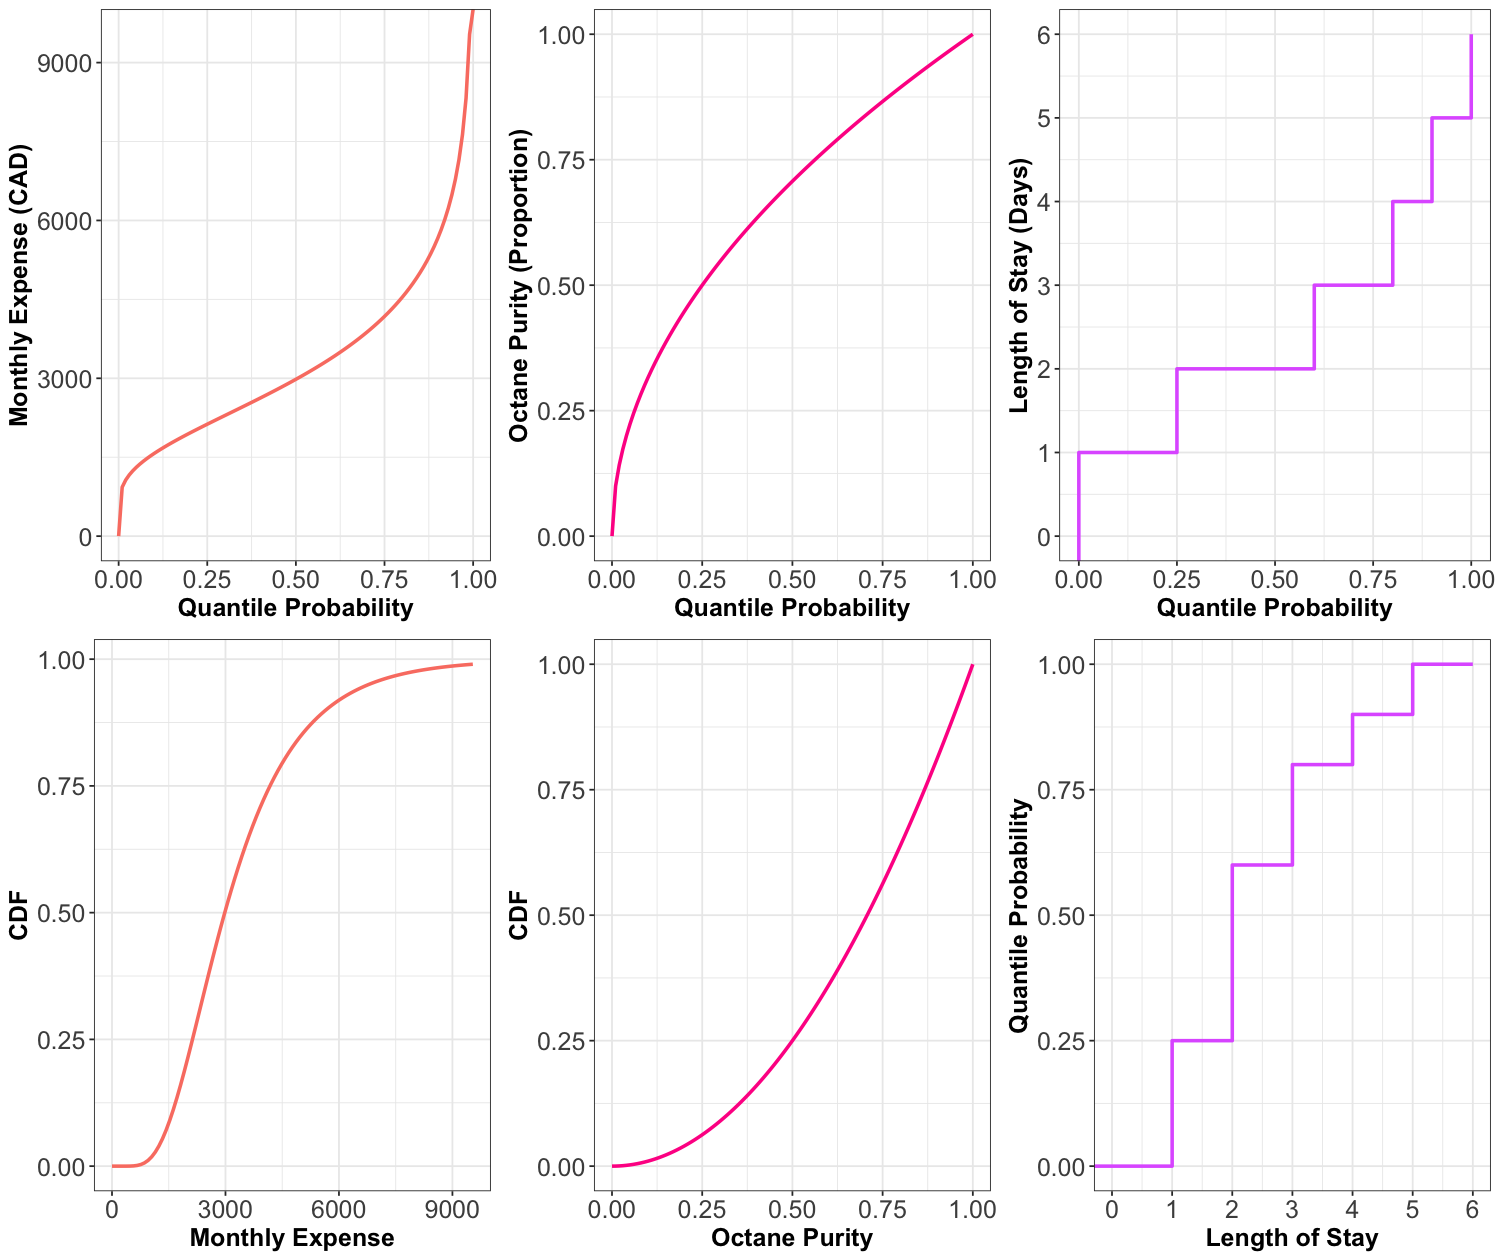

In [20]:
suppressWarnings(print(cowplot::plot_grid(
  tibble(x = 0:1) %>%
    ggplot(aes(x)) +
    stat_function(fun = expense$qdist, color = "salmon", linewidth = 1) +
    xlab("Quantile Probability") +
    ylab("Monthly Expense (CAD)") +
    theme_bw() + 
    scale_y_continuous(breaks = seq(0, 9000, 3000)) +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  tibble(x = 0:1) %>%
    ggplot(aes(x)) +
    stat_function(fun = octane$qdist, color = "deeppink", linewidth = 1) +
    xlab("Quantile Probability") +
    ylab("Octane Purity (Proportion)") +
    theme_bw() +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  los$pmf %>%
    pivot_longer(cols = right:left, names_to = "position", values_to = "ndays_double") %>%
    ggplot(aes(ndays_double + 1, cdf)) +
    geom_line(color = "mediumorchid1", linewidth = 1) +
    coord_flip() +
    ylab("Quantile Probability") +
    scale_x_continuous("Length of Stay (Days)", limits = c(0, 6), breaks = 0:6) +
    theme_bw() +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  tibble(x = expense$qdist(c(0, 0.99))) %>%
    ggplot(aes(x)) +
    stat_function(fun = expense$pdist, color = "salmon", linewidth = 1) +
    theme_bw() +
    ylab("CDF") +
    xlab("Monthly Expense") +
    scale_x_continuous(breaks = seq(0, 9000, 3000)) +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  tibble(x = c(0, 1)) %>%
    ggplot(aes(x)) +
    stat_function(fun = octane$pdist, color = "deeppink", linewidth = 1) +
    theme_bw() +
    labs(
      x = "Octane Purity",
      y = "CDF"
    ) +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  los$pmf %>%
    pivot_longer(cols = right:left, names_to = "position", values_to = "ndays_double") %>%
    ggplot(aes(ndays_double + 1, cdf)) +
    geom_line(color = "mediumorchid1", linewidth = 1) +
    ylab("Quantile Probability") +
    scale_x_continuous("Length of Stay", limits = c(0, 6), breaks = 0:6) +
    theme_bw() +
  theme(
    axis.text = element_text(size = 15),
    axis.title = element_text(size = 15, face = "bold")
  ),
  nrow = 2
)))

So, while the survival function was the CDF flipped upside down, the quantile function is the CDF with the axes swapped, or in other words, the CDF reflected diagonally.

```{important} 
Keep in mind that all these representations fully contain all the information about the distribution; they are different "*views*" of the same underlying random variable.
```

### 5.4. Other Ways of Representing a Distribution (Optional Section) 

There are even more ways to represent a distribution that we will not be going into, that you might have heard of. 

- **Moment generating function** (useful in mathematical statistics): 

$$M(t) = \mathbb{E}(e^{Xt}).$$

- **Hazard function** (useful in Survival Analysis; wait for *DSCI 562*): 

$$h(t) = \frac{f(t)}{S(t)}.$$

## 6. Additional Exercises

````{exercise}
:label: lecture5-q5

Let 

$$X = \text{Octane purity as a proportion.}$$ 

Its CDF is:

```{math}
:label: cdf-octane
F_X(x) = 
\begin{cases}
  0, \: x < 0\\
  x^2, \: 0 \leq x \leq 1, \\
  1, \: x > 1.
\end{cases}
```

Thus, what is $P(0.5 \leq X \leq 0.75)$? Select the correct option:

**A.** 0.25

**B.** 0.69

**C.** 0.75

**D.** 0.31
````

````{exercise}
:label: lecture5-q6

Using the CDF {eq}`cdf-octane`, what is $P(X > 0.75)$? Select the correct option:

**A.** 0.56

**B.** 0.85

**C.** 0.44

**D.** 0.15
````

```{exercise}
:label: lecture5-q7

Answer **TRUE** or **FALSE**:

Let $X$ be a continuous random variable whose PDF is $f_X(x)$. Knowing the PDF of $X$ means that we also know the CDF $F_X(x)$, but knowing the CDF does not imply knowing the density.

**A.** TRUE

**B.** FALSE
```